In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
di=[95.5,23.4,23.3,90,84.8,23.9,24.3,79.7,74.4,25.3,26,67.8,27.5,62,29.4,55.4,30.2,47.8,34.4,42.1]
d0=[22.5,94.6,89.7,23,23.2,84.1,78.7,23.3,23.6,72.7,67,25.2,60.5,26,53.6,27.6,47.8,30.2,38.6,30.9]

Valores individuales de f:
[18.21 18.76 18.5  18.32 18.22 18.61 18.57 18.03 17.92 18.77 18.73 18.37
 18.91 18.32 18.99 18.42 18.51 18.51 18.19 17.82]

Distancia focal promedio: 18.43 cm
Error estándar de la media: 0.07 cm


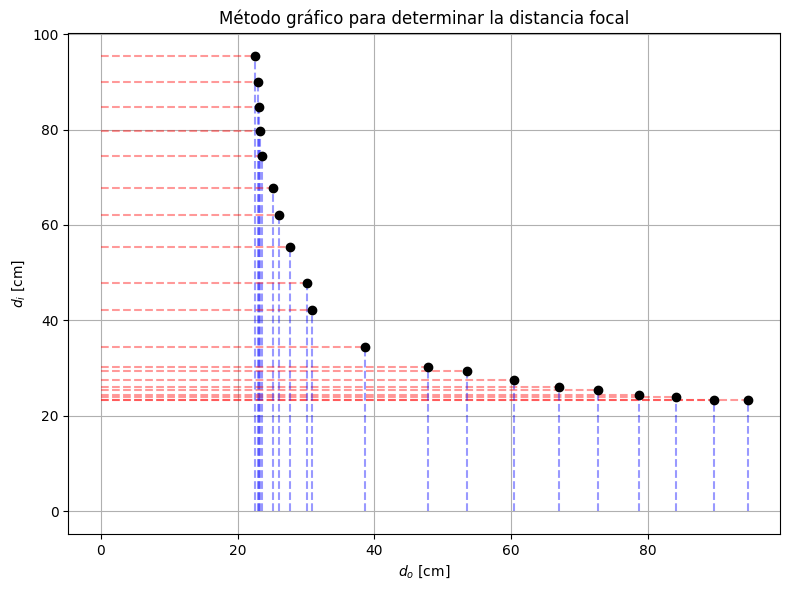

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Datos del experimento
di = np.array([95.5, 23.4, 23.3, 90, 84.8, 23.9, 24.3, 79.7, 74.4, 25.3, 26, 67.8, 27.5, 62, 29.4, 55.4, 30.2, 47.8, 34.4, 42.1])
d0 = np.array([22.5, 94.6, 89.7, 23, 23.2, 84.1, 78.7, 23.3, 23.6, 72.7, 67, 25.2, 60.5, 26, 53.6, 27.6, 47.8, 30.2, 38.6, 30.9])

# Paso 1: Calcular f para cada par de datos
focales = (d0 * di) / (d0 + di)

# Paso 2: Calcular promedio y error estándar
f_prom = np.mean(focales)
f_std_err = np.std(focales, ddof=1) / np.sqrt(len(focales))

print("Valores individuales de f:")
print(np.round(focales, 2))

print(f"\nDistancia focal promedio: {f_prom:.2f} cm")
print(f"Error estándar de la media: {f_std_err:.2f} cm")

# Paso 3: Gráfica del método gráfico (do vs di con líneas cruzadas)
plt.figure(figsize=(8,6))
for i in range(len(d0)):
    plt.plot([d0[i], d0[i]], [0, di[i]], 'b--', alpha=0.4)  # línea vertical
    plt.plot([0, d0[i]], [di[i], di[i]], 'r--', alpha=0.4)  # línea horizontal
    plt.plot(d0[i], di[i], 'ko')  # punto

plt.xlabel('$d_o$ [cm]')
plt.ylabel('$d_i$ [cm]')
plt.title('Método gráfico para determinar la distancia focal')
plt.grid(True)
plt.tight_layout()
plt.show()


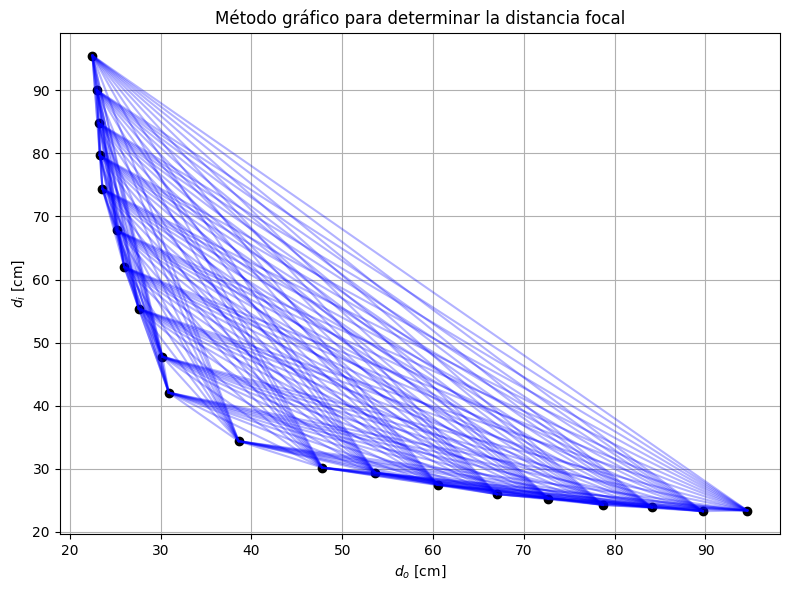

Punto de intersección promedio: (36998179847956.06 cm , -36094701595739.89 cm)
Distancia focal gráfica estimada: 451739126108.09 cm


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Datos del experimento
di = np.array([95.5, 23.4, 23.3, 90, 84.8, 23.9, 24.3, 79.7, 74.4, 25.3, 26, 67.8, 27.5, 62, 29.4, 55.4, 30.2, 47.8, 34.4, 42.1])
d0 = np.array([22.5, 94.6, 89.7, 23, 23.2, 84.1, 78.7, 23.3, 23.6, 72.7, 67, 25.2, 60.5, 26, 53.6, 27.6, 47.8, 30.2, 38.6, 30.9])

# Paso 1: Gráfica de los puntos y las rectas que los unen
plt.figure(figsize=(8,6))
for i in range(len(d0)):
    plt.plot(d0[i], di[i], 'ko')  # puntos experimentales

# Dibujar las rectas que unen los puntos
for (i, j) in combinations(range(len(d0)), 2):
    x_values = np.array([d0[i], d0[j]])
    y_values = np.array([di[i], di[j]])
    plt.plot(x_values, y_values, 'b-', alpha=0.3)

plt.xlabel('$d_o$ [cm]')
plt.ylabel('$d_i$ [cm]')
plt.title('Método gráfico para determinar la distancia focal')
plt.grid(True)
plt.tight_layout()
plt.show()

# Paso 2: Calcular las intersecciones de las rectas
def intersection(x1, y1, x2, y2, x3, y3, x4, y4):
    # Calcula la intersección entre dos rectas dadas por dos puntos cada una
    denom = (x1 - x2)*(y3 - y4) - (y1 - y2)*(x3 - x4)
    if denom == 0:
        return None  # Rectas paralelas
    px = ((x1*y2 - y1*x2)*(x3 - x4) - (x1 - x2)*(x3*y4 - y3*x4)) / denom
    py = ((x1*y2 - y1*x2)*(y3 - y4) - (y1 - y2)*(x3*y4 - y3*x4)) / denom
    return px, py

# Calcular todas las intersecciones posibles
intersecciones = []
for (i, j), (k, l) in combinations(combinations(range(len(d0)), 2), 2):
    # Puntos de la primera recta
    x1, y1 = d0[i], di[i]
    x2, y2 = d0[j], di[j]
    # Puntos de la segunda recta
    x3, y3 = d0[k], di[k]
    x4, y4 = d0[l], di[l]
    
    punto = intersection(x1, y1, x2, y2, x3, y3, x4, y4)
    if punto is not None:
        intersecciones.append(punto)

intersecciones = np.array(intersecciones)

# Paso 3: Calcular el promedio de las intersecciones (estimación del punto A)
x_prom = np.mean(intersecciones[:,0])
y_prom = np.mean(intersecciones[:,1])
f_prom = (x_prom + y_prom) / 2  # Estimación de f gráfica

# Mostrar resultados
print(f"Punto de intersección promedio: ({x_prom:.2f} cm , {y_prom:.2f} cm)")
print(f"Distancia focal gráfica estimada: {f_prom:.2f} cm")





In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos del experimento (en cm)
di = np.array([95.5, 23.4, 23.3, 90, 84.8, 23.9, 24.3, 79.7, 74.4, 25.3, 26, 67.8, 27.5, 62, 29.4, 55.4, 30.2, 47.8, 34.4, 42.1])
d0 = np.array([22.5, 94.6, 89.7, 23, 23.2, 84.1, 78.7, 23.3, 23.6, 72.7, 67, 25.2, 60.5, 26, 53.6, 27.6, 47.8, 30.2, 38.6, 30.9])

# Parte 1: Cálculo de f usando la ecuación 1/f = 1/d0 + 1/di
f_values = 1 / (1/d0 + 1/di)

# Resultados de la Parte 1
print("=== PARTE 1: Cálculo de la distancia focal usando la ecuación de lentes ===")
print("\nTabla de resultados:")
print("| Medición | d0 (cm) | di (cm) | f (cm) |")
print("|----------|---------|---------|--------|")
for i in range(len(d0)):
    print(f"| {i+1:2d}      | {d0[i]:6.1f} | {di[i]:6.1f} | {f_values[i]:5.2f} |")

# Cálculo del promedio y error
f_mean = np.mean(f_values)
f_std = np.std(f_values, ddof=1)  # Desviación estándar muestral
f_error = f_std / np.sqrt(len(f_values))  # Error estándar de la media

print("\nResultado final de la Parte 1:")
print(f"Distancia focal promedio: {f_mean:.2f} cm")
print(f"Desviación estándar: {f_std:.2f} cm")
print(f"Error estándar de la media: {f_error:.2f} cm")
print(f"Rango de incertidumbre: {f_mean:.2f} ± {f_error:.2f} cm")

=== PARTE 1: Cálculo de la distancia focal usando la ecuación de lentes ===

Tabla de resultados:
| Medición | d0 (cm) | di (cm) | f (cm) |
|----------|---------|---------|--------|
|  1      |   22.5 |   95.5 | 18.21 |
|  2      |   94.6 |   23.4 | 18.76 |
|  3      |   89.7 |   23.3 | 18.50 |
|  4      |   23.0 |   90.0 | 18.32 |
|  5      |   23.2 |   84.8 | 18.22 |
|  6      |   84.1 |   23.9 | 18.61 |
|  7      |   78.7 |   24.3 | 18.57 |
|  8      |   23.3 |   79.7 | 18.03 |
|  9      |   23.6 |   74.4 | 17.92 |
| 10      |   72.7 |   25.3 | 18.77 |
| 11      |   67.0 |   26.0 | 18.73 |
| 12      |   25.2 |   67.8 | 18.37 |
| 13      |   60.5 |   27.5 | 18.91 |
| 14      |   26.0 |   62.0 | 18.32 |
| 15      |   53.6 |   29.4 | 18.99 |
| 16      |   27.6 |   55.4 | 18.42 |
| 17      |   47.8 |   30.2 | 18.51 |
| 18      |   30.2 |   47.8 | 18.51 |
| 19      |   38.6 |   34.4 | 18.19 |
| 20      |   30.9 |   42.1 | 17.82 |

Resultado final de la Parte 1:
Distancia focal promedio: 

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


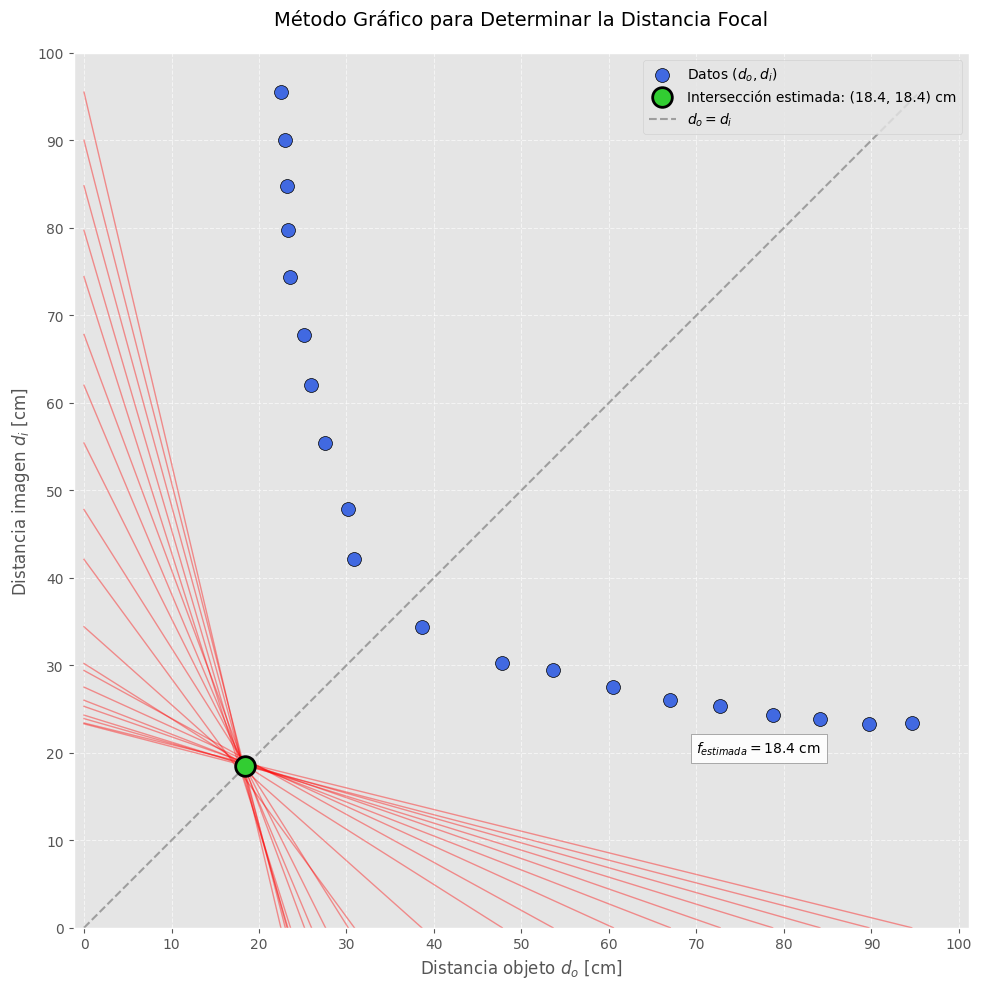

=== RESULTADOS DEL MÉTODO GRÁFICO ===
Punto de intersección estimado: (18.4, 18.4) cm

Comparación con método analítico: 18.4 cm
Diferencia: 0.0 cm


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Datos del experimento (en cm)
d0 = np.array([22.5, 94.6, 89.7, 23, 23.2, 84.1, 78.7, 23.3, 23.6, 72.7, 
               67, 25.2, 60.5, 26, 53.6, 27.6, 47.8, 30.2, 38.6, 30.9])
di = np.array([95.5, 23.4, 23.3, 90, 84.8, 23.9, 24.3, 79.7, 74.4, 25.3, 
               26, 67.8, 27.5, 62, 29.4, 55.4, 30.2, 47.8, 34.4, 42.1])

# Configuración del gráfico
plt.figure(figsize=(10, 10))

# Usar un estilo disponible (puedes ver los disponibles con print(plt.style.available))
plt.style.use('ggplot')  # Alternativa a seaborn-whitegrid

# 1. Graficar puntos de datos
plt.scatter(d0, di, color='royalblue', s=100, edgecolor='k', 
            label='Datos $(d_o, d_i)$', zorder=5)

# 2. Dibujar líneas de conexión (d0,0) a (0,di)
for x, y in zip(d0, di):
    plt.plot([x, 0], [0, y], 'r-', alpha=0.4, linewidth=1, zorder=1)

# 3. Calcular punto de intersección (f)
def residual(f, d0, di):
    return np.sum((1/f - 1/d0 - 1/di)**2)

res = minimize(residual, x0=20, args=(d0, di))
f_estimado = res.x[0]

# 4. Marcar el punto de intersección
plt.scatter([f_estimado], [f_estimado], color='limegreen', s=200, 
            edgecolor='k', linewidth=2, 
            label=f'Intersección estimada: ({f_estimado:.1f}, {f_estimado:.1f}) cm', 
            zorder=10)

# 5. Línea de referencia d0 = di
max_val = max(max(d0), max(di))
plt.plot([0, max_val], [0, max_val], '--', color='gray', 
         label='$d_o = d_i$', alpha=0.7, zorder=2)

# 6. Configuración estética del gráfico
plt.title('Método Gráfico para Determinar la Distancia Focal', fontsize=14, pad=20)
plt.xlabel('Distancia objeto $d_o$ [cm]', fontsize=12)
plt.ylabel('Distancia imagen $d_i$ [cm]', fontsize=12)
plt.xticks(np.arange(0, 101, 10))
plt.yticks(np.arange(0, 101, 10))
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('equal')
plt.xlim(0, 100)
plt.ylim(0, 100)

# 7. Leyenda y anotaciones
plt.legend(loc='upper right', fontsize=10)
plt.text(70, 20, f'$f_{{estimada}} = {f_estimado:.1f}$ cm', 
         bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray'))

# Mostrar gráfico
plt.tight_layout()
plt.show()

# Resultados numéricos
print("=== RESULTADOS DEL MÉTODO GRÁFICO ===")
print(f"Punto de intersección estimado: ({f_estimado:.1f}, {f_estimado:.1f}) cm")

# Cálculo analítico para comparación
f_analitico = np.mean(1 / (1/d0 + 1/di))
print(f"\nComparación con método analítico: {f_analitico:.1f} cm")
print(f"Diferencia: {abs(f_estimado-f_analitico):.1f} cm")

---- Estimaciones de la distancia focal ----

1. Método analítico:
   f = 18.43 ± 0.31 cm

2. Método gráfico (intersección de pares):
   f ≈ 44.40 cm

3. Relación mínima (do + di = 4f):
   f = 18.25 cm


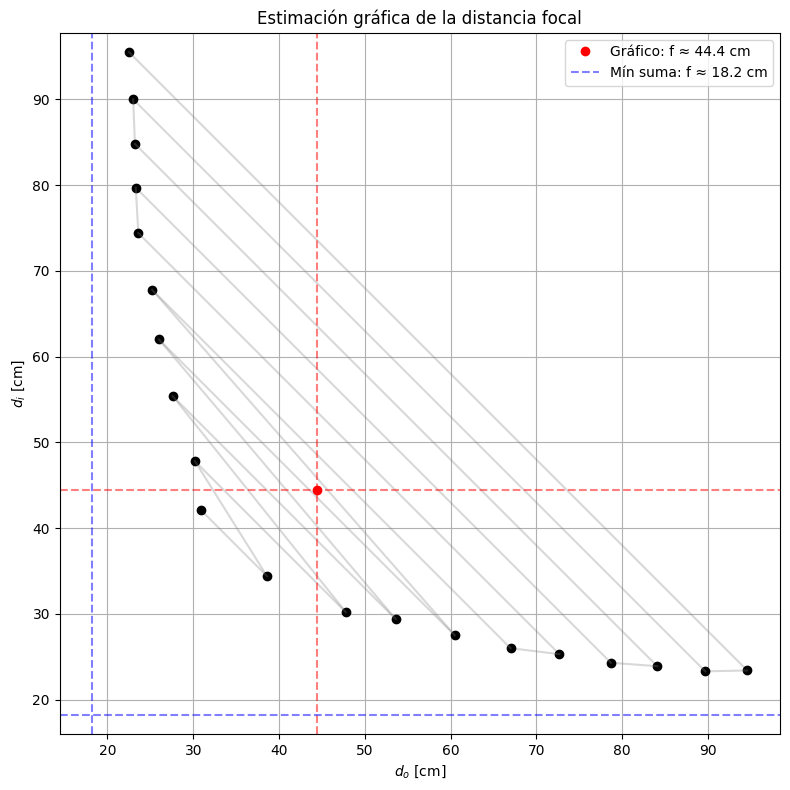

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos experimentales
di = np.array([95.5, 23.4, 23.3, 90, 84.8, 23.9, 24.3, 79.7, 74.4, 25.3,
               26, 67.8, 27.5, 62, 29.4, 55.4, 30.2, 47.8, 34.4, 42.1])
d0 = np.array([22.5, 94.6, 89.7, 23, 23.2, 84.1, 78.7, 23.3, 23.6, 72.7,
               67, 25.2, 60.5, 26, 53.6, 27.6, 47.8, 30.2, 38.6, 30.9])

# 1. MÉTODO ANALÍTICO
f_analitico = (d0 * di) / (d0 + di)
f_analitico_prom = np.mean(f_analitico)
f_analitico_std = np.std(f_analitico)

# 2. MÉTODO GRÁFICO (INTERSECCIÓN DE PARES)
def intersection(p1, p2, p3, p4):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    x4, y4 = p4

    denom = (x1 - x2)*(y3 - y4) - (y1 - y2)*(x3 - x4)
    if denom == 0:
        return None

    px = ((x1*y2 - y1*x2)*(x3 - x4) - (x1 - x2)*(x3*y4 - y3*x4)) / denom
    py = ((x1*y2 - y1*x2)*(y3 - y4) - (y1 - y2)*(x3*y4 - y3*x4)) / denom
    return (px, py)

intersecciones = []
for i in range(len(d0)-1):
    p1 = (d0[i], di[i])
    p2 = (d0[i+1], di[i+1])
    for j in range(i+1, len(d0)-1):
        p3 = (d0[j], di[j])
        p4 = (d0[j+1], di[j+1])
        inter = intersection(p1, p2, p3, p4)
        if inter and 0 < inter[0] < 100 and 0 < inter[1] < 100:
            intersecciones.append(inter)

intersecciones = np.array(intersecciones)
f_grafico = np.mean(intersecciones, axis=0)
f_grafico_prom = np.mean(f_grafico)

# 3. MÉTODO TEÓRICO: DO + DI MÍNIMO
suma_distancias = d0 + di
min_suma = np.min(suma_distancias)
f_por_min_suma = min_suma / 4

# IMPRIMIR RESULTADOS
print("---- Estimaciones de la distancia focal ----\n")
print(f"1. Método analítico:")
print(f"   f = {f_analitico_prom:.2f} ± {f_analitico_std:.2f} cm")

print(f"\n2. Método gráfico (intersección de pares):")
print(f"   f ≈ {f_grafico_prom:.2f} cm")

print(f"\n3. Relación mínima (do + di = 4f):")
print(f"   f = {f_por_min_suma:.2f} cm")

# OPCIONAL: GRAFICAR PARES CON ESTIMACIÓN GRÁFICA
plt.figure(figsize=(8, 8))
for i in range(len(d0)):
    plt.plot(d0[i], di[i], 'ko')
    if i < len(d0)-1:
        plt.plot([d0[i], d0[i+1]], [di[i], di[i+1]], 'gray', alpha=0.3)

# Marcar punto de intersección promedio
plt.plot(f_grafico_prom, f_grafico_prom, 'ro', label=f'Gráfico: f ≈ {f_grafico_prom:.1f} cm')
plt.axvline(f_grafico_prom, linestyle='--', color='r', alpha=0.5)
plt.axhline(f_grafico_prom, linestyle='--', color='r', alpha=0.5)

# Marcar mínimo do+di
plt.axvline(f_por_min_suma, linestyle='--', color='b', alpha=0.5, label=f'Mín suma: f ≈ {f_por_min_suma:.1f} cm')
plt.axhline(f_por_min_suma, linestyle='--', color='b', alpha=0.5)

plt.xlabel('$d_o$ [cm]')
plt.ylabel('$d_i$ [cm]')
plt.title('Estimación gráfica de la distancia focal')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.show()
